## Convolutional Neural Networks for Image Classification

## MNIST | CNN | CLASSIFIER | TENSORFLOW | KERAS


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
# imort dataset mnist
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

## Visual image


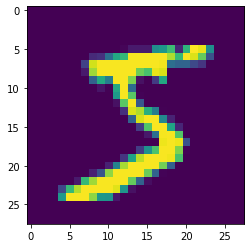

In [6]:
plt.imshow(x_train[0]);

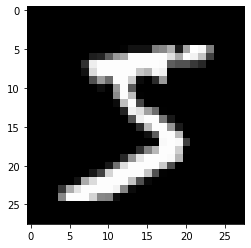

In [7]:
# color default gray
plt.imshow(x_train[0], cmap='gray');

## Preprocessing data y / one hot encoder / label

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [1]:
from tensorflow.keras.utils import to_categorical

In [11]:
# mencari nilai classes
y_classes = to_categorical(y_train)

In [12]:
y_classes.shape

(60000, 10)

In [13]:
y_classes.shape[1]

10

In [14]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [15]:
y_cat_test = to_categorical(y_test, num_classes =10)

----
### Normalization data x 

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [18]:
x_train[0].max()

255

In [19]:
x_train[0].min()

0

In [20]:
x_train = x_train/255

In [21]:
x_test = x_test/255

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

## reshape data x
menabahkan 1 dimensi

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

## Create Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters = 32,  kernel_size=(4,4), input_shape=(28, 28, 1), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation ='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## EarlyStopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience =2)

----
## Fitting Model

In [33]:
model.fit(x_train, y_cat_train, 
          epochs = 20, 
          validation_data = (x_test, y_cat_test), 
          callbacks =[early_stop])

Epoch 1/20
1875/1875 [==============================] - 66s 33ms/step - loss: 0.1580 - accuracy: 0.9521 - val_loss: 0.0518 - val_accuracy: 0.9830
Epoch 2/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0419 - val_accuracy: 0.9857
Epoch 3/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0384 - val_accuracy: 0.9871
Epoch 4/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 5/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0323 - val_accuracy: 0.9895
Epoch 6/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0328 - val_accuracy: 0.9884
Epoch 7/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0313 -

## Evaluation

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.157964,0.952150,0.051802,0.9830
1,0.057567,0.982350,0.041885,0.9857
2,0.042178,0.986467,0.038378,0.9871
3,0.031133,0.989850,0.032929,0.9887
4,0.022926,0.992800,0.032275,0.9895
5,0.018896,0.993700,0.032823,0.9884
6,0.015549,0.994800,0.031278,0.9910
7,0.013503,0.995567,0.037625,0.9890
8,0.011291,0.995933,0.040080,0.9886


In [36]:
plt.style.use(['science','notebook','grid'])

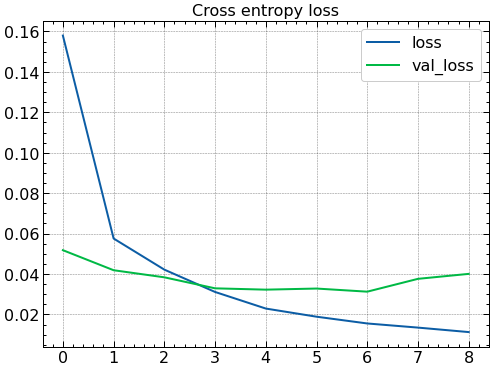

In [37]:
losses[['loss','val_loss']].plot();
plt.title('Cross entropy loss');

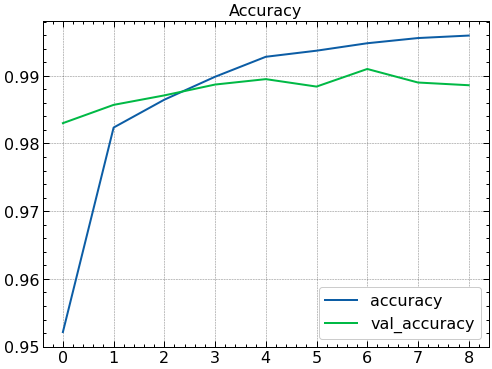

In [38]:
losses[['accuracy','val_accuracy']].plot();
plt.title('Accuracy');

## Prediction

In [39]:
prediction = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 9ms/step


In [40]:
y_cat_test.shape

(10000, 10)

In [41]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [42]:
prediction 

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## Evaluation metrics

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      1.00      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test, prediction)

array([[ 972,    0,    3,    0,    0,    1,    1,    1,    1,    1],
       [   0, 1129,    3,    0,    0,    0,    1,    1,    1,    0],
       [   0,    0, 1028,    0,    0,    0,    1,    3,    0,    0],
       [   0,    0,    3, 1000,    0,    5,    0,    0,    1,    1],
       [   0,    1,    1,    0,  967,    0,    4,    0,    0,    9],
       [   0,    0,    0,    1,    0,  888,    1,    0,    2,    0],
       [   4,    2,    0,    0,    1,    5,  942,    0,    4,    0],
       [   1,    3,    9,    0,    0,    0,    0, 1013,    0,    2],
       [   3,    1,    7,    1,    0,    3,    0,    2,  952,    5],
       [   0,    1,    0,    1,    5,    3,    0,    3,    1,  995]],
      dtype=int64)

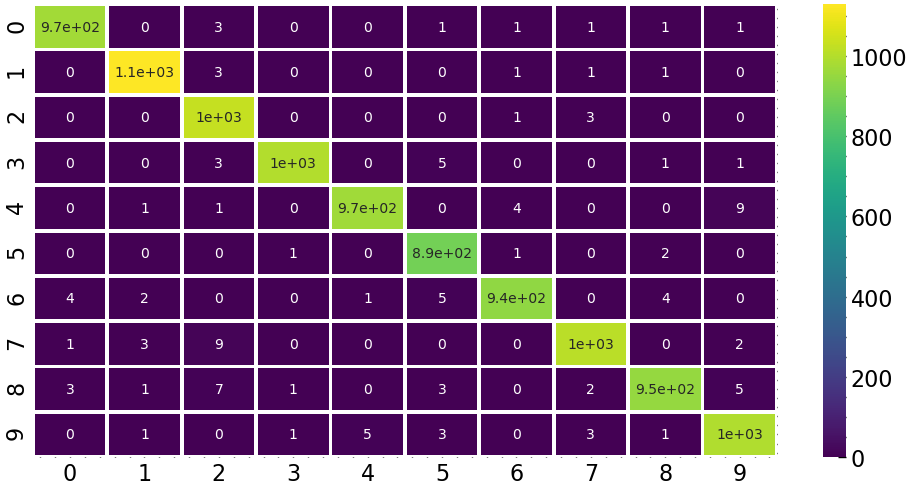

In [46]:
plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, lw=2, cmap='viridis');

## Prediction image

In [47]:
my_number = x_test[5]

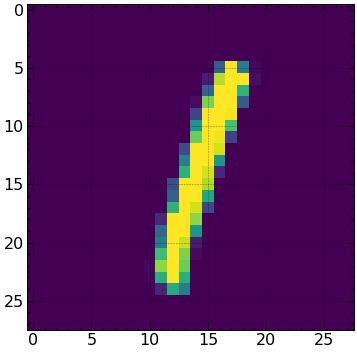

In [48]:
plt.imshow(my_number);

In [49]:
predict = np.argmax(model.predict(my_number.reshape(1, 28,28,1)), axis=-1)

1/1 [==============================] - 0s 78ms/step


In [50]:
predict

array([1], dtype=int64)

## Save Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('mnist.h5')

## Great job!